In [4]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 2: Generate a Sample Signal (composed of 3 sine waves)
# Sampling frequency (or sample rate in Hz)
# how many samples of the signal are taken per second.
# In audio terms, higher sampling frequency means better quality.
Fs = 1000 # Hz means you are taking 1000 samples every second.

# Sampling Period
# time between consecutive samples.
# Since Fs = 1000, T = 1 / 1000 = 0.001 seconds = 1 millisecond.
# Every millisecond, we take one sample of the signal.
T = 1 / Fs  # Sampling period (s)

# Signal Length
# This is the number of samples in the signal.
L = 1000

# Time vector
# tells us the time value for each sample.
# returns num evenly spaced samples starting from start to just before stop
# start = 0
# stop = L*T = 1.0 seconds
# num = L = 1000 samples
# endpoint=False excludes the final value (1.0), so it gives 1000 values from 0.0 to 0.999 seconds spaced by T = 0.001
t = np.linspace(0, L*T, L, endpoint=False)

# Create a signal with 3 different frequencies
f1, f2, f3 = 50, 120, 300  # Frequencies in Hz
signal = 0.7 * np.sin(2 * np.pi * f1 * t) + \
         0.5 * np.sin(2 * np.pi * f2 * t) + \
         0.2 * np.sin(2 * np.pi * f3 * t)

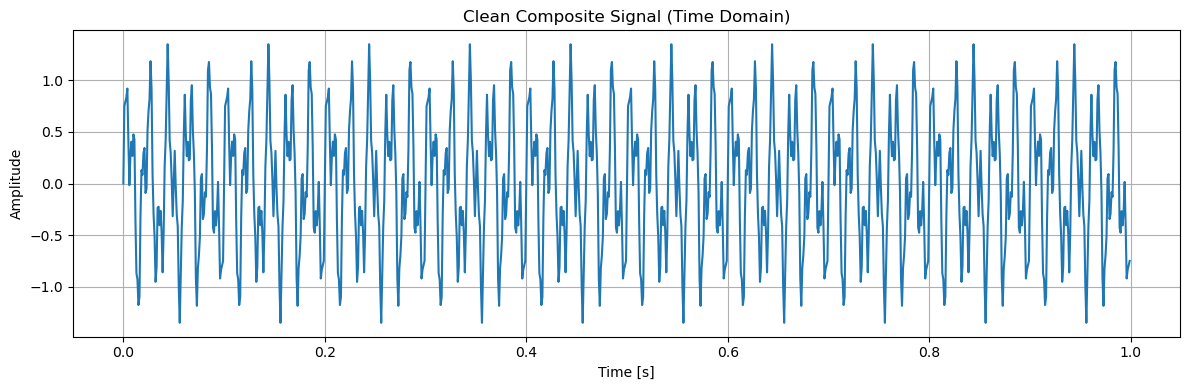

In [6]:
# Visualize the clean signal (without noise)
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title("Clean Composite Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Optional: Add some noise
noise = 0.3 * np.random.randn(L)
signal_noisy = signal + noise

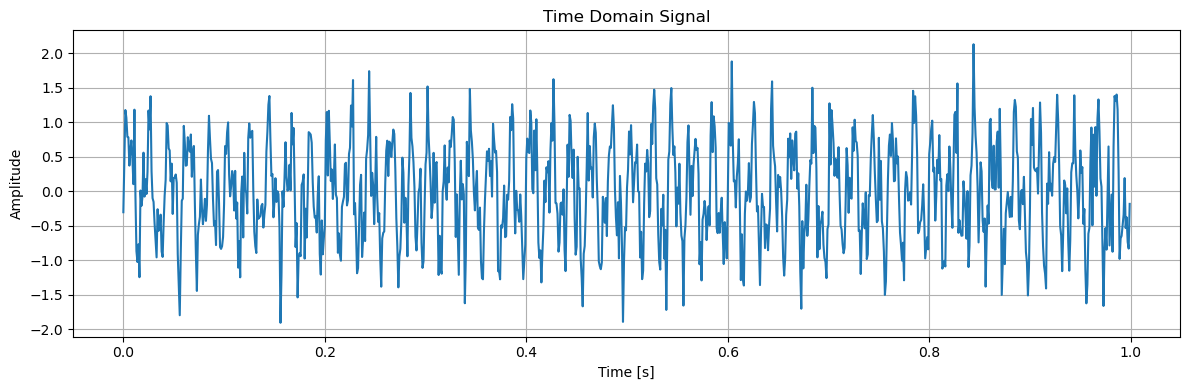

In [8]:
# Step 3: Plot the Time-Domain Signal
plt.figure(figsize=(12, 4))
plt.plot(t, signal_noisy)
plt.title("Time Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Step 4: Apply Fast Fourier Transform (FFT)
fft_result = np.fft.fft(signal_noisy)
fft_freq = np.fft.fftfreq(L, T)

In [10]:
# Only keep the positive frequencies
positive_freqs = fft_freq[:L // 2]
positive_magnitude = 2 / L * np.abs(fft_result[:L // 2])

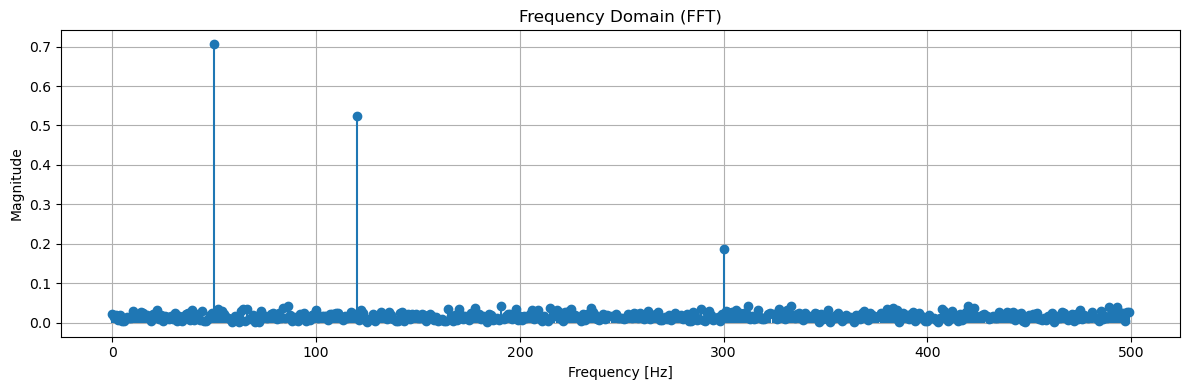

In [11]:
# Step 5: Plot the Frequency Spectrum
plt.figure(figsize=(12, 4))
plt.stem(positive_freqs, positive_magnitude, basefmt=" ")
plt.title("Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

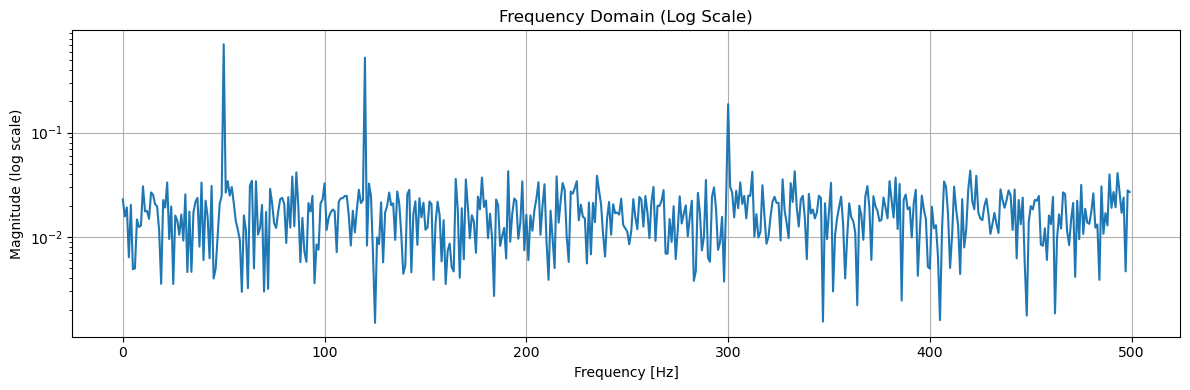

In [12]:
# Step 6: Log-scaled Frequency Spectrum (optional)
plt.figure(figsize=(12, 4))
plt.semilogy(positive_freqs, positive_magnitude)
plt.title("Frequency Domain (Log Scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()